# Линейная регрессия. Работа с признаками

## Описание задачи и загрузка данных

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов.

In [31]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1

Есть ли в наборе данных пропущенные значения? Если да, удалите их.

Также выведите на экран число пропусков в каждом столбце.

In [32]:
data .describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


### Задача 2

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их.

In [33]:
data=data.drop(columns='Unnamed: 0')

### Задание 3

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

<Axes: >

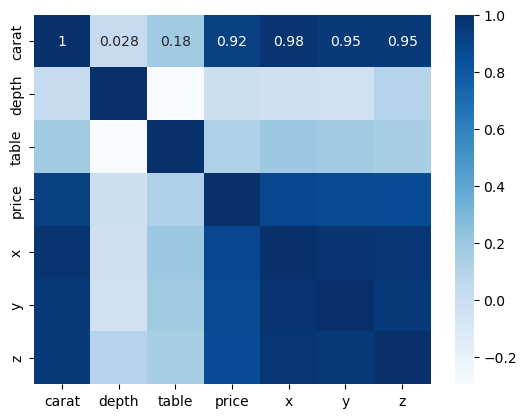

In [34]:
numeric=data.select_dtypes([np.number]).columns
data
sb.heatmap(data[numeric].corr(),cmap="Blues", annot=True)

### Задание 4

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

*P.S. Числовые столбцы оставляем в таблице без изменений.*

In [55]:
data_encoded=pd.get_dummies(data, drop_first=True)
data_encoded.shape

(53940, 24)

### Задание 5

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`. Также создайте вектор `y`, содержащий целевую переменную `price`.

In [56]:
X=data_encoded.drop(columns='price')
y=data['price']

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`.

При разбиении укажите `random_state = 42`.

In [57]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest =train_test_split(X,y,test_size=0.3,random_state=42)

In [58]:
ytrain.shape

(37758,)

### Задание 6

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему.

In [38]:
numeric=numeric [numeric!='price']

In [39]:
numeric

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(Xtrain)

X_train_scaled = scaler.transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

### Задание 7

Обучите линейную регрессию на тренировочной выборке. Выведите *r2-score* на тренировочной и тестовой выборках.

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model=LinearRegression()
model.fit(X_train_scaled_df,ytrain)
y_pred=model.predict(X_test_scaled_df)

r2 = r2_score(y_pred, ytest)
r2 

0.9130855790030588

### Задание 8

Выведите на экран веса, которые линейная регрессия присвоила признакам.

Какой признак имеет наибольший отрицательный вес? (наибольший по модулю среди всех отрицательных весов)

In [61]:
X_train_scaled.shape

(37758, 23)

In [62]:
Xtrain.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [63]:
model.coef_

array([ 5338.61567061,   -90.17381703,   -60.33227991, -1100.41885004,
          -6.45891672,   -34.25894462,   170.60293265,   414.36951486,
         339.23920411,   310.65425625,   -83.64002086,  -104.56099268,
        -202.86356354,  -362.00229958,  -442.78356742,  -529.44921589,
         975.93364117,  1611.5716809 ,  1042.92121499,  1670.31849636,
        1817.66420828,  1284.80947523,  1461.03419387])

## Попытка улучшить качество модели

Данная часть является творческой, и задания в ней немного сложнее, чем предыдущие.

Следующие вопросы не проверяются тестами.

### Задание 9

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [68]:
num_data=data[numeric]
num_data.corr()

,carat,depth,table,x,y,z
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


In [76]:
data.drop(columns=['x','y','z'])

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


In [71]:
data_encoded=pd.get_dummies(data, drop_first=True)

In [72]:
X=data_encoded.drop(columns='price')
y=data['price']

In [73]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest =train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(Xtrain)

X_train_scaled = scaler.transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model=LinearRegression()
model.fit(X_train_scaled_df,ytrain)
y_pred=model.predict(X_test_scaled_df)

r2 = r2_score(y_pred, ytest)
r2 

0.9130855790030588

### Задание 10

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?